In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [2]:

def threshold_image(im,th):
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1
    return thresholded_im

def compute_otsu_criteria(im, th):
    thresholded_im = threshold_image(im,th)
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1
    if weight1 == 0 or weight0 == 0:
        return np.inf
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0
    return weight0 * var0 + weight1 * var1


In [3]:

POPULATION_SIZE = 20
N_GENERATIONS = 50
MUTATION_RATE = 0.002
TOURNAMENT_SIZE = 5

def create_individual():

    return [random.randint(0, 1) for _ in range(8)]

def binary_to_decimal(binary_list):

    return int("".join(map(str, binary_list)), 2)

def selection(population, fitness_scores):

    tournament = random.sample(list(zip(population, fitness_scores)), TOURNAMENT_SIZE)

    winner = min(tournament, key=lambda x: x[1])
    return winner[0]

def crossover(parent1, parent2):
 
    crossover_point = random.randint(1, 7)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

def mutate(individual):

    for i in range(len(individual)):
        if random.random() < MUTATION_RATE:
            individual[i] = 1 - individual[i] # Flip the bit
    return individual

def find_best_threshold_ga(im):


    population = [create_individual() for _ in range(POPULATION_SIZE)]
    
    best_overall_individual = None
    best_overall_fitness = np.inf

    print("--- Starting Genetic Algorithm ---")
    

    for generation in range(N_GENERATIONS):

        fitness_scores = []
        for individual in population:
            threshold = binary_to_decimal(individual)
            fitness = compute_otsu_criteria(im, threshold)
            fitness_scores.append(fitness)


        min_fitness = min(fitness_scores)
        if min_fitness < best_overall_fitness:
            best_overall_fitness = min_fitness
            best_overall_individual = population[fitness_scores.index(min_fitness)]
            
        print(f"Generation {generation+1}/{N_GENERATIONS} | Best Fitness: {best_overall_fitness:.4f} | Threshold: {binary_to_decimal(best_overall_individual)}")


        new_population = []
        

        new_population.append(best_overall_individual)

        while len(new_population) < POPULATION_SIZE:

            parent1 = selection(population, fitness_scores)
            parent2 = selection(population, fitness_scores)
            

            child = crossover(parent1, parent2)
            child = mutate(child)
            
            new_population.append(child)
            
        population = new_population

    best_threshold = binary_to_decimal(best_overall_individual)
    print(f"\n--- GA Finished ---")
    print(f"Best threshold found: {best_threshold}")
    return best_threshold


--- Starting Genetic Algorithm ---
Generation 1/50 | Best Fitness: 521.9977 | Threshold: 134
Generation 2/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 3/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 4/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 5/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 6/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 7/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 8/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 9/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 10/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 11/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 12/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 13/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 14/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 15/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 16/50 | Best Fitness: 520.8555 | Threshold: 135
Generation 17/50 | Best Fitnes

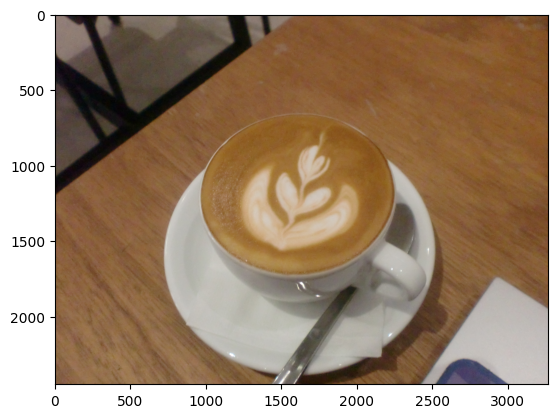

In [4]:
path_image = 'CIMG5004.JPG'
new_size=(400,300)

im = np.asarray(Image.open(path_image).convert('L').resize(new_size))
best_th_ga = find_best_threshold_ga(im)
im_ga_otsu = threshold_image(im, best_th_ga)
import matplotlib.image as mpimg
image = mpimg.imread(path_image)
plt.imshow(image)
plt.show()


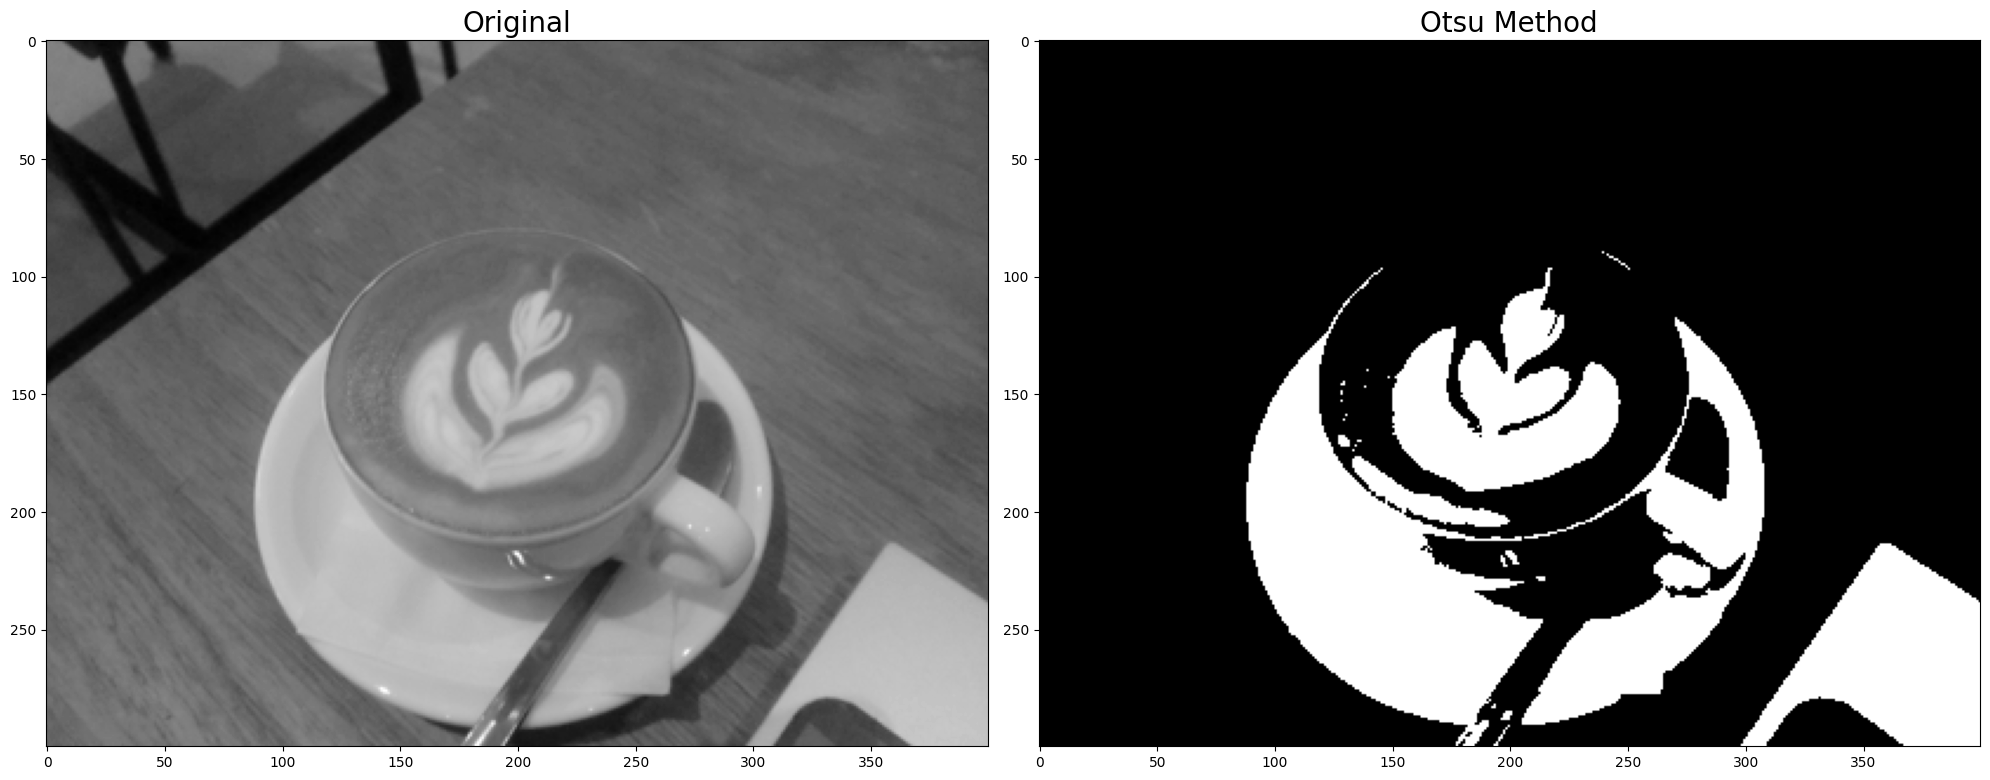

In [5]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Original',fontsize=20)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.title('Otsu Method',fontsize=20)
plt.imshow(im_ga_otsu,cmap='gray')
plt.tight_layout()